In [ ]:
#SPRINT 1

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/claudiocarvalho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/claudiocarvalho/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/claudiocarvalho/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Coletados 550 comentários.
['“ phone 2 year ago still work holy shit ”', '13 pro def best pro model till dateexcluding pro max', 'case look awesome', '’ like ’ super old phone course ’ still good', 'come man iphone 3gs still fully work iphones need factory reset occasionally replace battery 😉 last forever']
       vader_polarity
count      550.000000
mean         0.208523
std          0.409362
min         -0.931300
25%          0.000000
50%          0.128000
75%          0.526700
max          0.958400

VaderSentiment:
Média: 0.20852345454545454
Mediana: 0.128
Moda: 0.0
Variância: 0.16757701571482034
Desvio Padrão: 0.40936171745147387
Alcance: 1.8897


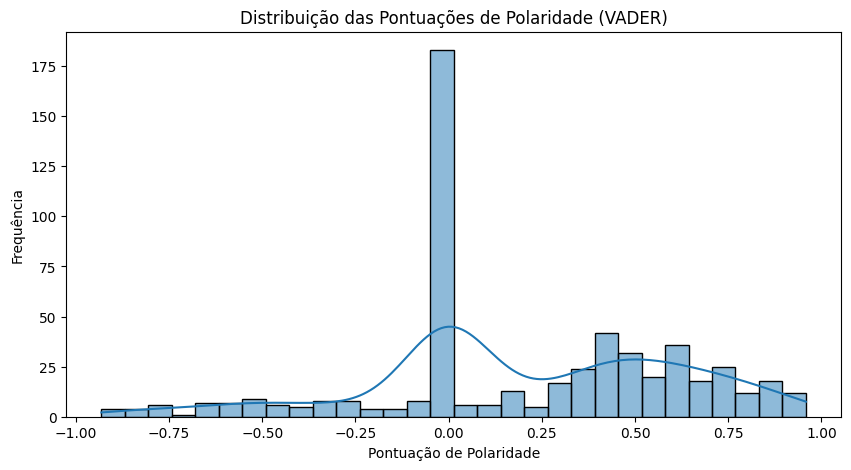

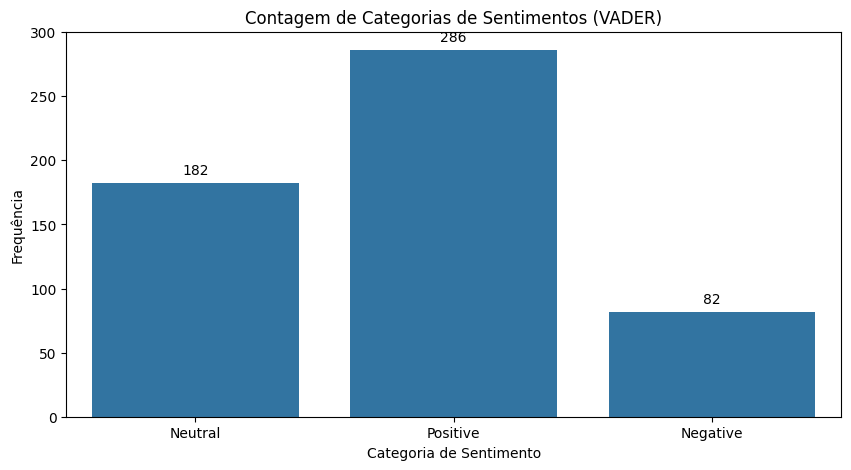

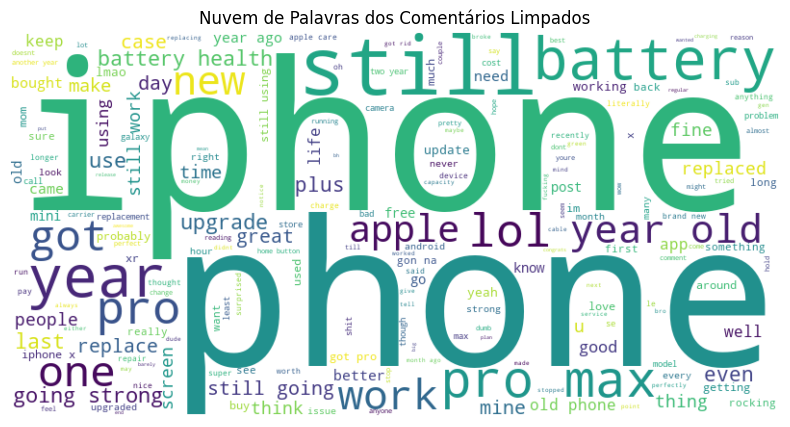

As 15 palavras mais frequentes são:
[('’', 254), ('still', 144), ('year', 125), ('phone', 120), ('pro', 109), ('iphone', 109), ('battery', 95), ('13', 84), ('like', 62), ('max', 61), ('old', 59), ('got', 54), ('2', 53), ('work', 51), ('12', 42)]


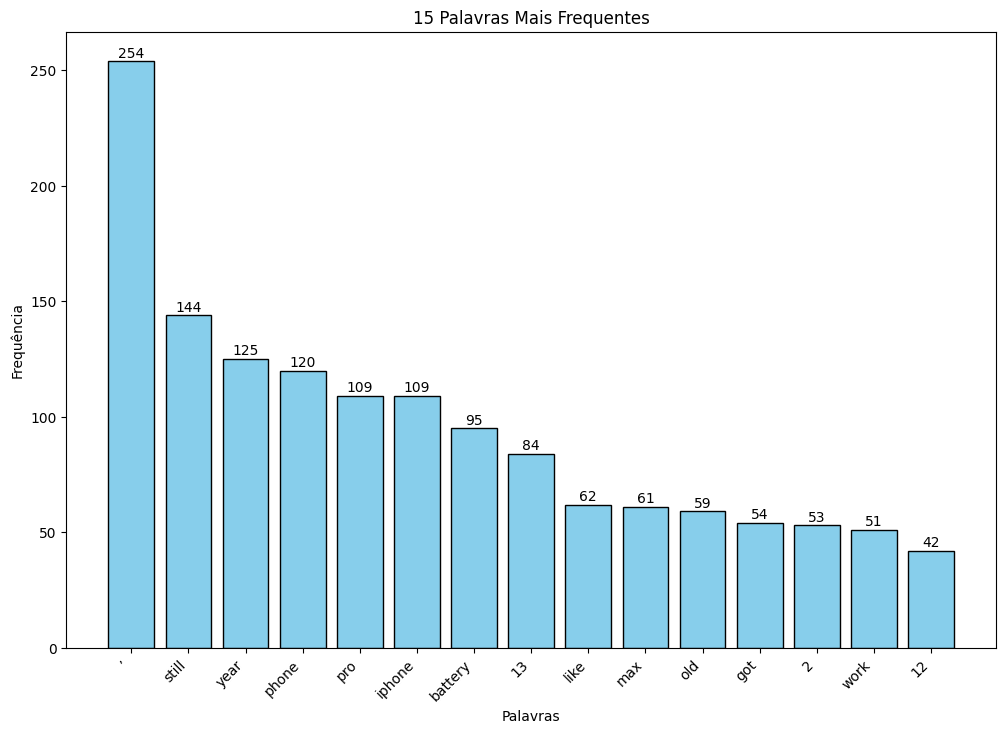

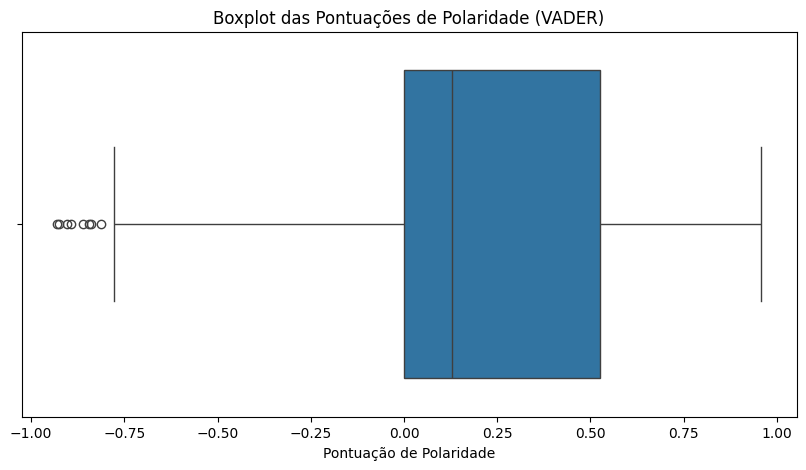

Coletados 366 comentários.
['id say like 95 perfect phone', 'everytime turn display look fall love havent really found anything dont like phone', 'pretty much perfect really', 'httpspreviewreddittv2jmiskswed1jpegwidth1001formatpjpgautowebpsea32230cfad56f3b1f37fe4223c83654f2b2ba57', 'im happy probably upgrade s25 noticeable improvement complaint phone worn oleophobic coating software rare bug freeze take second register input battery life 34 hour sot great thing display overall performance comfortable hold charge pretty fast little extra thing like wireless reverse charging etc']
       vader_polarity
count      366.000000
mean         0.331230
std          0.470446
min         -0.925300
25%          0.000000
50%          0.421500
75%          0.724775
max          0.988800

VaderSentiment:
Média: 0.3312303278688525
Mediana: 0.4215
Moda: 0.0
Variância: 0.22131954184482372
Desvio Padrão: 0.4704461093949271
Alcance: 1.9141


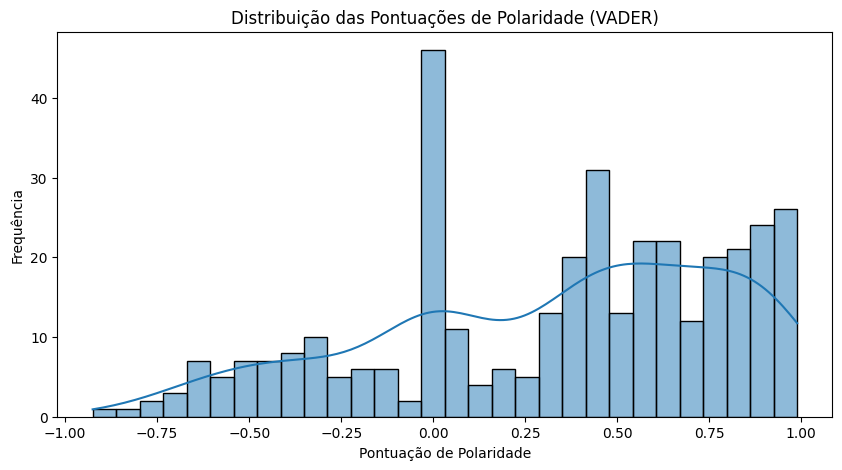

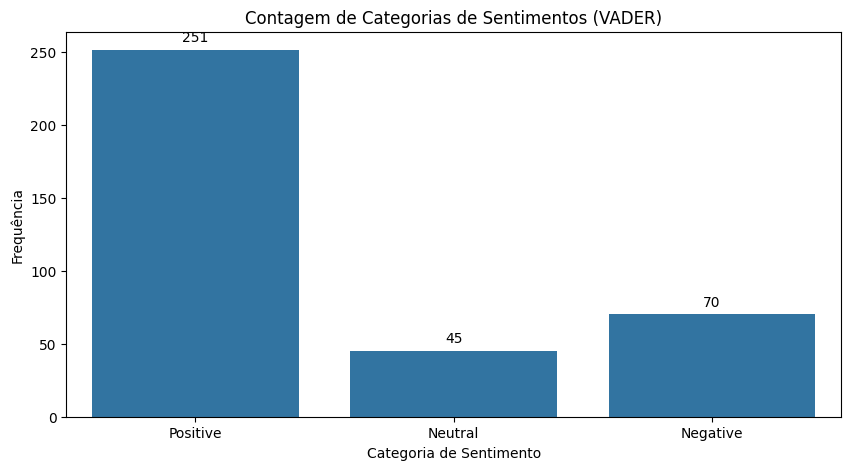

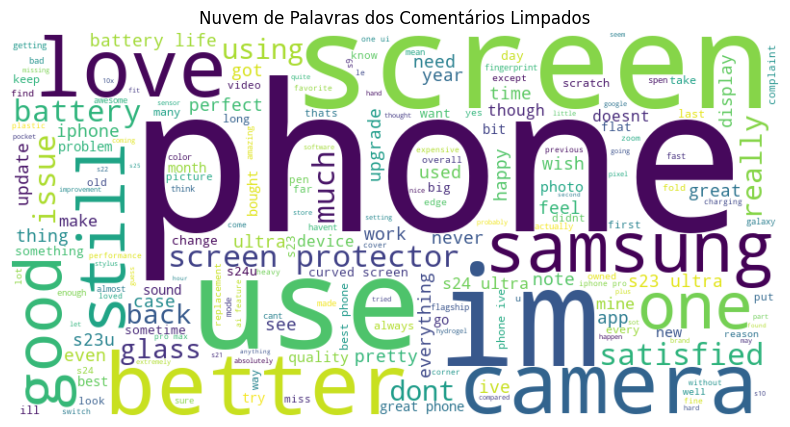

As 15 palavras mais frequentes são:
[('phone', 199), ('screen', 101), ('ultra', 66), ('like', 62), ('battery', 59), ('im', 57), ('use', 48), ('better', 47), ('camera', 46), ('protector', 46), ('one', 44), ('love', 43), ('samsung', 41), ('still', 37), ('good', 37)]


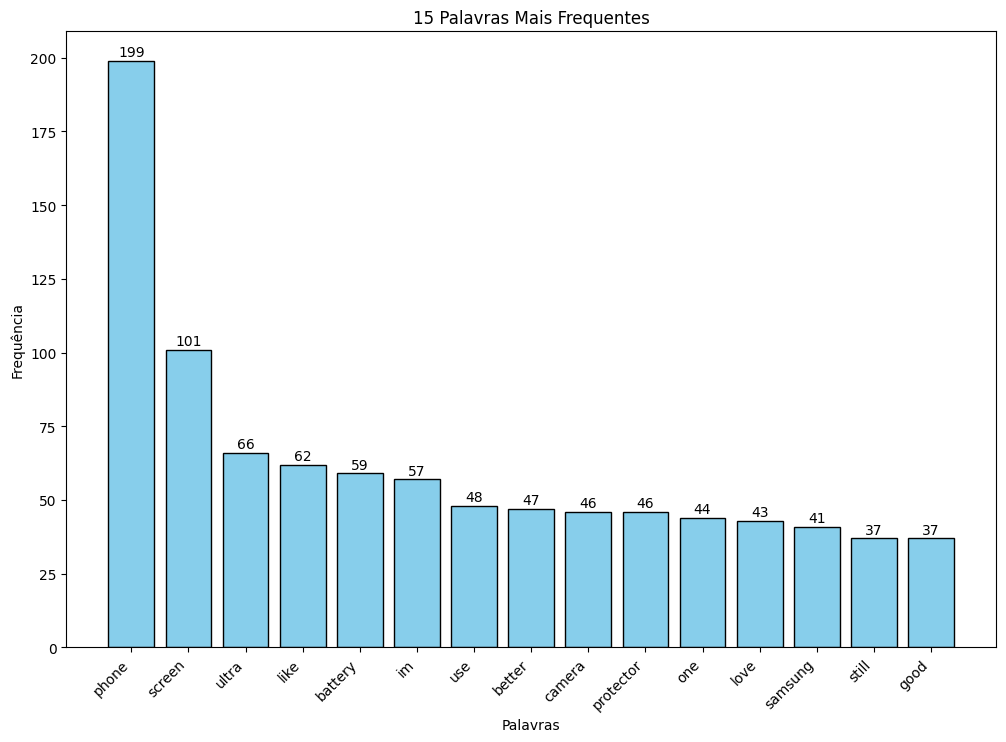

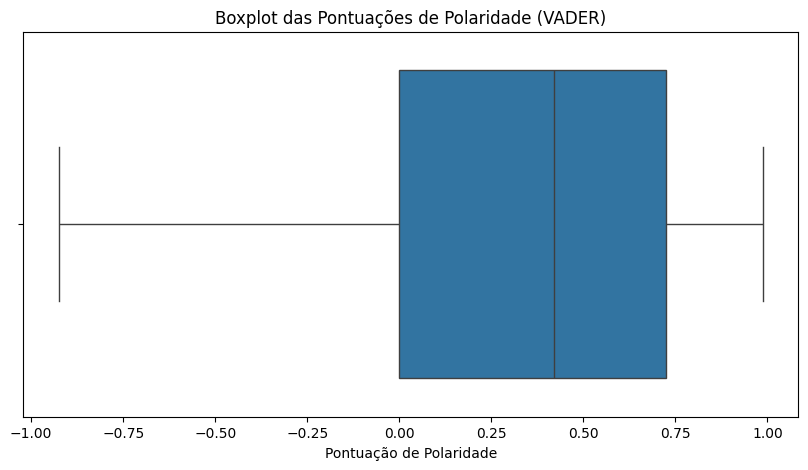

In [11]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud
from collections import Counter
import numpy as np

# Baixar recursos necessários do NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Configurar a autenticação no Reddit
reddit = praw.Reddit(
    client_id='lEptkfWwqGDj8VVlgyl_ZA',
    client_secret='h5ij1osK6lRahZr_-Vr661g44CfQEw',
    user_agent='AnalistaXP',
    username='Minute_Purpose_2504',
    password='A031948a'
)

# Função para coletar comentários
def get_comments(url):
    submission = reddit.submission(url=url)
    submission.comments.replace_more(limit=None)
    comments = [comment.body for comment in submission.comments.list()]
    return comments

# Função para limpar comentários
def clean_comment(comment):
    comment = comment.lower()
    comment = comment.translate(str.maketrans('', '', string.punctuation))
    words = nltk.word_tokenize(comment)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

# Função para analisar sentimentos com VADER
def analyze_sentiment_vader(comment):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(comment)
    return sentiment['compound']

# Função para classificação de sentimentos
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Processamento e análise para uma URL específica
def process_and_analyze(url, filename):
    # Coletar comentários
    comments = get_comments(url)
    print(f"Coletados {len(comments)} comentários.")

    # Limpar os comentários
    clean_comments = [clean_comment(comment) for comment in comments]
    print(clean_comments[:5])

    # Analisar os sentimentos
    vader_sentiments = [analyze_sentiment_vader(comment) for comment in comments]

    # Salvar resultados em um DataFrame
    df = pd.DataFrame({
        'comment': comments,
        'clean_comment': clean_comments,
        'vader_polarity': vader_sentiments,
    })
    df.to_csv(filename, index=False)

    # Carregar os dados
    df = pd.read_csv(filename)
    df['clean_comment'] = df['clean_comment'].fillna('')

    # Estatísticas descritivas básicas
    desc_stats = df.describe()
    print(desc_stats)

    # Estatísticas descritivas adicionais
    mean = df['vader_polarity'].mean()
    median = df['vader_polarity'].median()
    mode = df['vader_polarity'].mode()[0]
    variance = df['vader_polarity'].var()
    std_dev = df['vader_polarity'].std()
    range_ = df['vader_polarity'].max() - df['vader_polarity'].min()

    print(f"\nVaderSentiment:")
    print(f"Média: {mean}")
    print(f"Mediana: {median}")
    print(f"Moda: {mode}")
    print(f"Variância: {variance}")
    print(f"Desvio Padrão: {std_dev}")
    print(f"Alcance: {range_}")

    # Visualização da distribuição das pontuações de polaridade para VADER
    plt.figure(figsize=(10, 5))
    sns.histplot(df['vader_polarity'], kde=True, bins=30)
    plt.xlabel('Pontuação de Polaridade')
    plt.ylabel('Frequência')
    plt.title('Distribuição das Pontuações de Polaridade (VADER)')
    plt.show()

    # Aplicar a classificação para VADER
    df['vader_polarity_category'] = df['vader_polarity'].apply(classify_sentiment)

    # Contagem de categorias para VADER
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=df['vader_polarity_category'])
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')
    plt.title('Contagem de Categorias de Sentimentos (VADER)')
    plt.xlabel('Categoria de Sentimento')
    plt.ylabel('Frequência')
    plt.show()

    # Criar uma string única com todos os comentários limpos
    all_clean_comments = ' '.join(df['clean_comment'])

    # Gerar a nuvem de palavras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_clean_comments)

    # Exibir a nuvem de palavras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nuvem de Palavras dos Comentários Limpados')
    plt.show()

    # Obter as 15 palavras mais frequentes
    word_counts = Counter(all_clean_comments.split())
    most_common_words = word_counts.most_common(15)
    print("As 15 palavras mais frequentes são:")
    print(most_common_words)

    # Visualização das 15 palavras mais frequentes em gráfico de barras 2D
    fig, ax = plt.subplots(figsize=(12, 8))
    words = [item[0] for item in most_common_words]
    frequencies = [item[1] for item in most_common_words]

    bars = ax.bar(words, frequencies, color='skyblue', edgecolor='black')
    ax.set_xlabel('Palavras')
    ax.set_ylabel('Frequência')
    ax.set_title('15 Palavras Mais Frequentes')

    # Adicionar as frequências dentro das barras
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Visualização de boxplot para as pontuações de polaridade
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df['vader_polarity'])
    plt.xlabel('Pontuação de Polaridade')
    plt.title('Boxplot das Pontuações de Polaridade (VADER)')
    plt.show()

# Processar e analisar os dados para o iPhone 13 Pro
url_iphone = "https://www.reddit.com/r/iPhone13Pro/comments/1as7v8a/this_thing_is_still_doing_strong_13_pro_3/"
process_and_analyze(url_iphone, "reddit_comments_sentiments_vader_iphone_13_pro.csv")

# Processar e analisar os dados para o Galaxy S23 Ultra
url_galaxy = "https://www.reddit.com/r/GalaxyS23Ultra/comments/1ecucv6/how_satisfied_you_with_the_galaxy_s23_ultra/"
process_and_analyze(url_galaxy, "reddit_comments_sentiments_vader_galaxy_s23_ultra.csv")
